<a href="https://colab.research.google.com/github/riya36512/ML-Projects/blob/main/Titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic Classifier**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('train.csv')
data2 = pd.read_csv('test.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data2.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


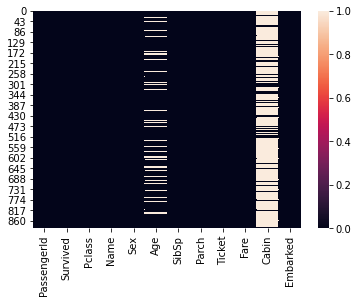

In [ ]:
sns.heatmap(data.isnull())

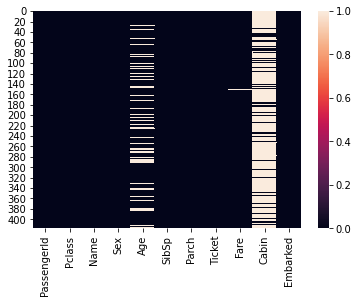

In [ ]:
sns.heatmap(data2.isnull())

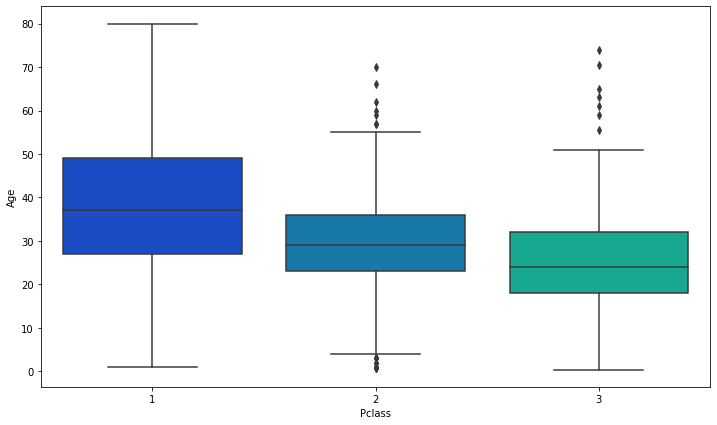

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

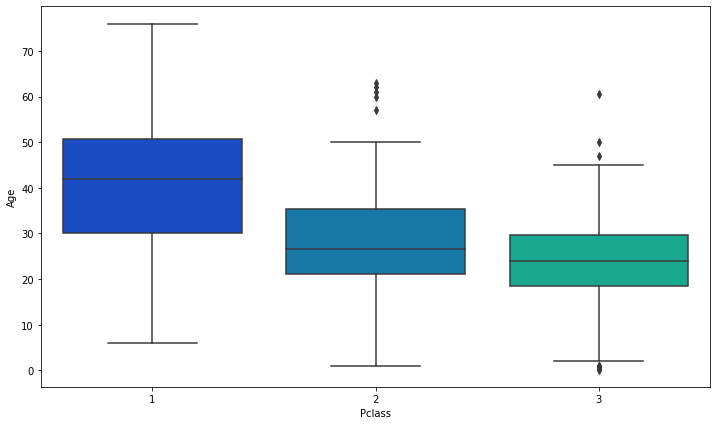

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=data2,palette='winter')

In [ ]:
def input_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

In [ ]:
def input_Fare(cols):
  Fare = cols[0]
  Pclass = cols[1]
  if pd.isnull(Fare):
    if Pclass==1:
      return 80
    elif Pclass==2:
      return 40
    else:
      return 20
  else:
    return Fare

In [ ]:
data['Age'] = data[['Age','Pclass']].apply(input_age,axis=1)
data['Fare'] = data[['Age','Pclass']].apply(input_Fare,axis=1)
data2['Age'] = data2[['Age','Pclass']].apply(input_age,axis=1)
data2['Fare'] = data2[['Age','Pclass']].apply(input_Fare,axis=1)

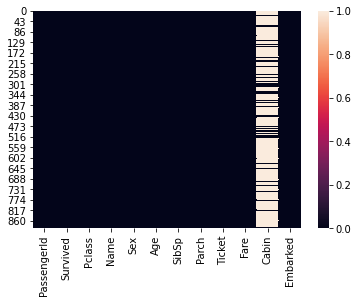

In [ ]:
sns.heatmap(data.isnull())

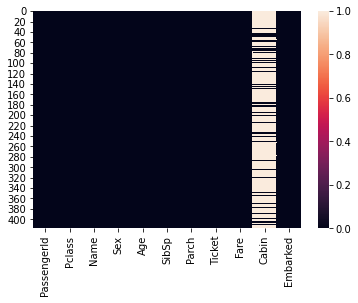

In [ ]:
sns.heatmap(data2.isnull())

In [ ]:
data.drop('Cabin',axis=1,inplace=True)
data2.drop('Cabin',axis=1,inplace=True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,35.0,S


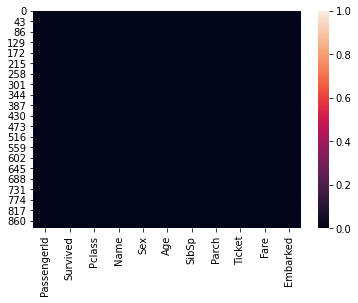

In [ ]:
sns.heatmap(data.isnull())

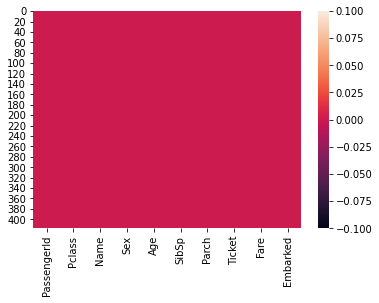

In [ ]:
sns.heatmap(data2.isnull())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
data2.info

<bound method DataFrame.info of      PassengerId  Pclass  ...  Fare Embarked
0            892       3  ...  34.5        Q
1            893       3  ...  47.0        S
2            894       2  ...  62.0        Q
3            895       3  ...  27.0        S
4            896       3  ...  22.0        S
..           ...     ...  ...   ...      ...
413         1305       3  ...  24.0        S
414         1306       1  ...  39.0        C
415         1307       3  ...  38.5        S
416         1308       3  ...  24.0        S
417         1309       3  ...  24.0        C

[418 rows x 10 columns]>

In [ ]:
pd.get_dummies(data['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
pd.get_dummies(data2['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [ ]:
pd.get_dummies(data['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
pd.get_dummies(data2['Sex'],drop_first=True).head()

,male
0,1
1,0
2,1
3,1
4,0


In [ ]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embarked = pd.get_dummies(data['Embarked'],drop_first=True)


In [ ]:
sex_test = pd.get_dummies(data2['Sex'],drop_first=True)
embarked_test = pd.get_dummies(data2['Embarked'],drop_first=True)


In [ ]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
data2.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,22.0
1,2,1,1,38.0,1,0,38.0
2,3,1,3,26.0,0,0,26.0
3,4,1,1,35.0,1,0,35.0
4,5,0,3,35.0,0,0,35.0


In [ ]:
data2.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,34.5
1,893,3,47.0,1,0,47.0
2,894,2,62.0,0,0,62.0
3,895,3,27.0,0,0,27.0
4,896,3,22.0,1,1,22.0


In [ ]:
data = pd.concat([data,sex,embarked],axis=1)
data2 = pd.concat([data2,sex_test,embarked_test],axis=1)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,22.0,1,0,1
1,2,1,1,38.0,1,0,38.0,0,0,0
2,3,1,3,26.0,0,0,26.0,0,0,1
3,4,1,1,35.0,1,0,35.0,0,0,1
4,5,0,3,35.0,0,0,35.0,1,0,1


In [ ]:
data2.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,34.5,1,1,0
1,893,3,47.0,1,0,47.0,0,0,1
2,894,2,62.0,0,0,62.0,1,1,0
3,895,3,27.0,0,0,27.0,1,0,1
4,896,3,22.0,1,1,22.0,0,0,1


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,29.066409,0.647587,0.086420,0.722783
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,13.244532,0.477990,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,26.000000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,37.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,80.000000,1.000000,1.000000,1.000000


In [ ]:
data2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.321770,0.447368,0.392344,29.321770,0.636364,0.110048,0.645933
std,120.810458,0.841838,12.904065,0.896760,0.981429,12.904065,0.481622,0.313324,0.478803
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,25.000000,0.000000,0.000000,25.000000,1.000000,0.000000,1.000000
75%,1204.750000,3.000000,36.375000,1.000000,0.000000,36.375000,1.000000,0.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,76.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('Survived',axis=1),data['Survived'],test_size=0.3,random_state=10)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score

In [ ]:
confusionMatrix = confusion_matrix(y_test,model.predict(X_test))
confusionMatrix

array([[153,  21],
       [ 29,  65]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,model.predict(X_test))
accuracy

0.8134328358208955

In [ ]:
f1 = f1_score(y_test,model.predict(X_test))
f1

0.7222222222222223

**SVM**

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel="linear")
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
prediction = model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [ ]:
confusionMatrix = confusion_matrix(y_test,prediction)
confusionMatrix

array([[152,  22],
       [ 29,  65]])

In [ ]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.8097014925373134

In [ ]:
f1 = f1_score(y_test,prediction)
f1

0.7182320441988951

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

**Random Forest Classifier**

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [ ]:
confusionMatrix = confusion_matrix(y_test,prediction)
confusionMatrix

array([[147,  27],
       [ 26,  68]])

In [ ]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.8022388059701493

In [ ]:
f1 = f1_score(y_test,prediction)
f1

0.7195767195767198

**AdaBoostClassifier**

In [ ]:
model =AdaBoostClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [ ]:
confusionMatrix = confusion_matrix(y_test,prediction)
confusionMatrix

array([[146,  28],
       [ 22,  72]])

In [ ]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.8134328358208955

In [ ]:
f1 = f1_score(y_test,prediction)
f1

0.7422680412371133

**GradientBoostingClassifier**

In [ ]:
model =GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [ ]:
confusionMatrix = confusion_matrix(y_test,prediction)
confusionMatrix

array([[154,  20],
       [ 29,  65]])

In [ ]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.8171641791044776

In [ ]:
f1 = f1_score(y_test,prediction)
f1

0.7262569832402235